In [171]:
from Common_functions import  *

%matplotlib inline

In [2]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import scipy.stats as st
from os.path import expanduser
import cmath
from scipy import optimize
import time
import gzip
from scipy.interpolate import interp1d
import pandas as pd
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,inset_axes,InsetPosition) 
import traceback
from lmfit import minimize, Parameters, Parameter, report_fit
import matplotlib.patches as patches
from sympy.solvers import solve
from sympy import Symbol
import sympy


%matplotlib inline
home = os.path.expanduser("~")

In [3]:

def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))

In [4]:
def cal_chisqr(model, fx, ferr):
    
    
    return np.sum(((fx-model)**2)/((ferr)**2))

In [5]:
# def PSPL_data (params, t, m_data):
    
#     t0 = params['t0'].value
#     tE = params['tE'].value
#     u0 = params['u0'].value
#     base = params['base'].value
#     fs = params['fs'].value
# #     fb = params['fb'].value

#     u = np.sqrt(u0**2+((t-t0)/tE)**2)
#     A = ((u**2)+2)/(u*np.sqrt(u**2+4))
#     F = (fs * (A-1)) +1
#     fx = base*np.ones(len(t)) + (-2.5 * np.log10(F))
#     return fx - m_data

# def PSPL (t0, tE, u0, base,fs, t):
    
#     u = np.sqrt(u0**2+((t-t0)/tE)**2)
#     A = ((u**2)+2)/(u*np.sqrt(u**2+4))
#     F = (fs * (A-1)) +1
#     fx = base*np.ones(len(t)) + (-2.5 * np.log10(F))
#     return fx

In [6]:
# def Calculate_PSPL_minus_Cauchy (t, m, e):
    
    
    
#     lightcurve = np.zeros((len(t),4))
#     lightcurve[:,0] = t
#     lightcurve[:,1] = m
#     lightcurve[:,2] = e
#     peak = t[np.argmin(m)]

#     df, baseline, event, it0, dt = prepare(t,m,e)

#     A_max = df['A'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #np.max(df['A']) #1.0/(float(f_s_true)/(max(df['f'])-1+float(f_s_true)))
#     u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
#     t0_true =  df['t'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #it0 #t[A.argmax()] #float(t0_theo)
#     amp_ini = np.median(lightcurve[baseline,1]) - lightcurve[it0,1]
#     tE_true = [0.01, 0.1, 1.0, 10.0, 100]
    
#     #################################
    
#     temp_PSPL = [[], []]
#     for tE in tE_true:

#         params2 = Parameters()
#         params2.add('t0', value= t0_true, min=min(df['t']), max=max(df['t']))
#         params2.add('tE', value= tE, min=0.001, max=1000)
#         params2.add('u0', value= u0_true, min=0, max=5)
#         params2.add('base', value= np.median(lightcurve[baseline,1]), min=max((lightcurve[baseline,1])), max=min((lightcurve[baseline,1])))
#         params2.add('fs', value= 1, min=0, max=1)
# #             params2.add('fb', value= 0.5, min=0, max=1)


#         res2 = minimize(PSPL_data, params2, args=(df['t'].values, df['magnitude'].values))

#         temp_PSPL[0].append(res2.params)
#         temp_PSPL[1].append(res2.chisqr)

#     result2 = temp_PSPL[0][np.argmin(temp_PSPL[1])]

#     PSPL_m = PSPL(result2['t0'], result2['tE'], result2['u0'],
#                   result2['base'], result2['fs'] , df['t'])
#     #PSPL_m = base*np.ones(len(PSPL_A)) + (-2.5 * np.log10(PSPL_A))
    
#     c = result2['tE']*result2['u0']
# #     m_top_temp = df['magnitude'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    
# #     while (len(m_top_temp)<5):
        
# #         c = c*2
# #         m_top_temp = df['magnitude'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
        

#     m_top = df['magnitude'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     model_top = PSPL_m[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     m_err_top = df['m_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

#     chisqr_PSPL = np.sum((df['magnitude'].values-PSPL_m)**2)

#     chisqr_PSPL_err = cal_chisqr(PSPL_m, df['magnitude'].values, df['m_err'].values)
#     chisqr_PSPL_top = cal_chisqr(model_top, m_top.values, m_err_top.values)
#     chisqr_PSPL_top_reduced = chisqr_PSPL_top/len(model_top)
    
#     ##################################
#     temp_bell = [[], []]
#     for tE in tE_true:

#         params = Parameters()
#         params.add('t0', value= t0_true, min=min(df['t']), max=max(df['t']))
#         params.add('tE', value= tE, min=0.0001, max=1000)
#         params.add('b', value= 1, min=0, max=20)
#         params.add('amp', value= amp_ini, min=0, max=20)


#         res1 = minimize(bell_curve_data, params, args=(df['t'].values, -lightcurve[:,1]+np.median(lightcurve[baseline,1])))
#         temp_bell[0].append(res1.params)
#         temp_bell[1].append(res1.chisqr)
        
#     result1 = temp_bell[0][np.argmin(temp_bell[1])]

#     bellcurve_m = np.median(lightcurve[baseline,1])-bell_curve(t, result1['t0'], result1['tE'] , 
#                                                                   result1['b'], result1['amp'])

#     #print bellcurve_m
#     m_top = df['magnitude'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     model_top = bellcurve_m[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     m_err_top = df['m_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    
#     chisqr_bell = np.sum((df['magnitude'].values-bellcurve_m)**2)
#     chisqr_bell_err = cal_chisqr(bellcurve_m, df['magnitude'].values, df['m_err'].values)
#     chisqr_bell_top = cal_chisqr(model_top, m_top.values, m_err_top.values)
#     chisqr_bell_top_reduced = chisqr_bell_top/(len(model_top))
    
#     #################################
    
#     return df, baseline, event, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL,\
#             chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top, chisqr_bell_top_reduced, chisqr_PSPL_top_reduced
    

In [459]:
# def Calculate_PSPL_minus_Cauchy (t, m, e):
    
    
    
#     df, baseline, event, it0, dt = prepare(t,m,e)


#     A_max = df['A'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #np.max(df['A']) #1.0/(float(f_s_true)/(max(df['f'])-1+float(f_s_true)))
# #     u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
#     t0_true =  df['t'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #it0 #t[A.argmax()] #float(t0_theo)
#     amp_ini =  df.A[it0] - np.median(df.A[baseline])
#     tE_true = [0.01, 0.1, 1.0, 10.0, 100]
    
#     fs_true = 0.5
#     if A_max > 1:
#         u0 = Symbol('u0')
#         solve_u0 = (solve((2+u0**2)/(u0*sympy.sqrt(4+u0**2))-((A_max-(1-fs_true))/fs_true), u0))

#         u0_true = np.array(solve_u0[0], dtype=np.float64)
#     else:
#         u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
        

#     #################################
    
#     temp_PSPL = [[], []]
#     for tE in tE_true:

#         params2 = Parameters()
#         params2.add('t0', value= t0_true, min=min(df['t']), max=max(df['t']))
#         params2.add('tE', value= tE, min=0.001, max=1000)
#         params2.add('u0', value= solve_u0, min=0, max=5)
#     #     params2.add('base', value= np.median(lightcurve[baseline,1]), min=max((lightcurve[baseline,1])), max=min((lightcurve[baseline,1])))
#         params2.add('fs', value= fs_true, min=0, max=1)
#     #             params2.add('fb', value= 0.5, min=0, max=1)


#         res2 = minimize(PSPL_data, params2, args=(df['t'].values, df['A'].values))

#         temp_PSPL[0].append(res2.params)
#         temp_PSPL[1].append(res2.chisqr)

#     result2 = temp_PSPL[0][np.argmin(temp_PSPL[1])]

#     PSPL_A = PSPL(result2['t0'], result2['tE'], result2['u0'], result2['fs'] , df['t'])
    
#     c = result2['tE']*result2['u0']
    
#     A_top_temp = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    
#     while (len(A_top_temp)<10):
        
#         c = c*2
#         A_top_temp = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

#     t_top = df['t'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     A_top = A_top_temp#df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     model_top = PSPL_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

#     chisqr_PSPL = np.sum((df['A'].values-PSPL_A)**2)

#     chisqr_PSPL_err = cal_chisqr(PSPL_A, df['A'].values, df['A_err'].values)
#     chisqr_PSPL_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
#     chisqr_PSPL_top_reduced = chisqr_PSPL_top/len(model_top)
    
#     ##################################
#     temp_bell = [[], []]

#     params = Parameters()
#     params.add('t0', value= result2['t0'], min=min(df['t']), max=max(df['t']))
#     params.add('tE', value= result2['tE'], min=0.0001, max=1000)
#     params.add('b', value= 1, min=0, max=20)
#     params.add('amp', value= A_max, min=0, max=20)


#     res1 = minimize(bell_curve_data, params, args=(df['t'].values, df.A ))
# #     temp_bell[0].append(res1.params)
# #     temp_bell[1].append(res1.chisqr)

#     result1 = res1.params
#     bellcurve_A = bell_curve(df.t, result1['t0'], result1['tE'] ,result1['b'], result1['amp'])




#     A_top = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     model_top = bellcurve_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
#     A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

#     chisqr_bell = np.sum((df['A'].values-bellcurve_A)**2)
#     chisqr_bell_err = cal_chisqr(bellcurve_A, df['A'].values, df['A_err'].values)
#     chisqr_bell_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
#     chisqr_bell_top_reduced = chisqr_bell_top/(len(model_top))


    
#     #################################
    
#     topright_len = len(A_top[t_top>result2['t0']])
#     topleft_len = len(A_top[t_top<result2['t0']])
    
#     return df, baseline, event, topright_len, topleft_len, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL,\
#             chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top, chisqr_bell_top_reduced, chisqr_PSPL_top_reduced
    

In [7]:
def Calculate_PSPL_minus_Cauchy (t, m, e):
    
    
    
    df, baseline, event, it0, dt = prepare(t,m,e)


    A_max = df['A'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #np.max(df['A']) #1.0/(float(f_s_true)/(max(df['f'])-1+float(f_s_true)))
#     u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
    t0_true =  df['t'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #it0 #t[A.argmax()] #float(t0_theo)
    amp_ini =  df.A[it0] - np.median(df.A[baseline])
    tE_true = [0.01, 0.1, 1.0, 10.0, 100]
    
    fs_true = 0.5
    if A_max > 1:
        u0 = Symbol('u0')
        solve_u0 = (solve((2+u0**2)/(u0*sympy.sqrt(4+u0**2))-((A_max-(1-fs_true))/fs_true), u0))

        u0_true = np.array(solve_u0[0], dtype=np.float64)
    else:
        u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
        


    
    #################################
    
    temp_PSPL = [[], []]
    for tE in tE_true:

        params2 = Parameters()
        params2.add('t0', value= t0_true, min=min(df['t']), max=max(df['t']))
        params2.add('tE', value= tE, min=0.001, max=1000)
        params2.add('u0', value= u0_true, min=0, max=5)
    #     params2.add('base', value= np.median(lightcurve[baseline,1]), min=max((lightcurve[baseline,1])), max=min((lightcurve[baseline,1])))
        params2.add('fs', value= fs_true, min=0, max=1)
    #             params2.add('fb', value= 0.5, min=0, max=1)


        res2 = minimize(PSPL_data, params2, args=(df['t'].values, df['A'].values))

        temp_PSPL[0].append(res2.params)
        temp_PSPL[1].append(res2.chisqr)

    result2 = temp_PSPL[0][np.argmin(temp_PSPL[1])]

    PSPL_A = PSPL(result2['t0'], result2['tE'], result2['u0'], result2['fs'] , df['t'])
    
    c = result2['tE']*result2['u0']

    t_top = df['t'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    A_top = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    model_top = PSPL_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

    chisqr_PSPL = np.sum((df['A'].values-PSPL_A)**2)

    chisqr_PSPL_err = cal_chisqr(PSPL_A, df['A'].values, df['A_err'].values)
    chisqr_PSPL_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
    chisqr_PSPL_top_reduced = chisqr_PSPL_top/len(model_top)
    
    ##################################
    temp_bell = [[], []]

    params = Parameters()
    params.add('t0', value= result2['t0'], min=min(df['t']), max=max(df['t']))
    params.add('tE', value= result2['tE'], min=0.0001, max=1000)
    params.add('b', value= 1, min=0, max=20)
    params.add('amp', value= A_max, min=0, max=20)


    res1 = minimize(bell_curve_data, params, args=(df['t'].values, df.A ))
    temp_bell[0].append(res1.params)
    temp_bell[1].append(res1.chisqr)

    result1 = temp_bell[0][np.argmin(temp_bell[1])]
    bellcurve_A = bell_curve(df.t, result1['t0'], result1['tE'] ,result1['b'], result1['amp'])




    A_top = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    model_top = bellcurve_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
    A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

    chisqr_bell = np.sum((df['A'].values-bellcurve_A)**2)
    chisqr_bell_err = cal_chisqr(bellcurve_A, df['A'].values, df['A_err'].values)
    chisqr_bell_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
    chisqr_bell_top_reduced = chisqr_bell_top/(len(model_top))


    
    #################################
    
    topright_len = len(A_top[t_top>result2['t0']])
    topleft_len = len(A_top[t_top<result2['t0']])
    
    return df, baseline, event, topright_len, topleft_len, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL,\
            chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top, chisqr_bell_top_reduced, chisqr_PSPL_top_reduced
    

In [227]:
# Plot for the paper = 'mag.dcnormffp_0_82_427.det.lc.W149'
name = 'mag.dcnormffp_0_82_640.det.lc.W149'
f = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'+str(name)
# Testing the fit on an OGLE free-floating candidate with a large value of rho

# f = 'data/OGLE_2012_BLG_0406/phot.dat'
t,m,e = np.loadtxt(f,unpack=True, usecols=(0,1, 2))

F = 100**((np.max(m)-m)/5)

df = pd.DataFrame({'t': t, 'Flux_Ratio': F, 'magnitude': m, 'm_err': e})

In [228]:
df, baseline, event, it0, dt = prepare(t,m,e)


A_max = df['A'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #np.max(df['A']) #1.0/(float(f_s_true)/(max(df['f'])-1+float(f_s_true)))
u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )
t0_true =  df['t'][np.argmin(m[m>np.percentile(m, [0.0,100])[0]])] #it0 #t[A.argmax()] #float(t0_theo)
amp_ini =  df.A[it0] - np.median(df.A[baseline])
tE_true = [0.01, 0.1, 1.0, 10.0, 100]
pr

In [229]:
fs_true = 0.4

In [230]:
if A_max > 1:
    u0 = Symbol('u0')
    solve_u0 = (solve((2+u0**2)/(u0*sympy.sqrt(4+u0**2))-((A_max-(1-fs_true))/fs_true), u0))

    u0_true = np.array(solve_u0[0], dtype=np.float64)
else:
    u0_true = np.sqrt( ( (1+np.sqrt(1+16*(A_max**2)))/(2* A_max) ) - 2 )

In [231]:
u0_true

array(1.23277519)

(520.3279690002091, 524.3279690002091)

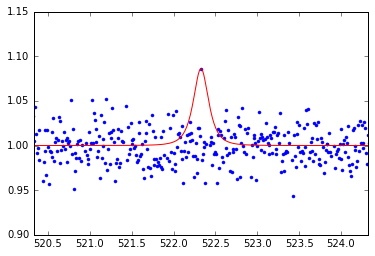

In [232]:
dt = 1
plt.plot(df.t-2458234, df.A, 'b.')
plt.plot(df.t-2458234, PSPL(t0_true, 0.1, u0_true, fs_true, df.t),'r-')
plt.xlim(t0_true-2458234- dt*2, t0_true-2458234+dt*2)

In [209]:
xdata = df.t
ydata = df.A
errdata = df.A_err

In [210]:
temp_PSPL = [[], []]
for tE in tE_true:

#     nll = lambda *args: -lnlike(*args)
#     res_scipy = op.minimize(nll, [t0_true,tE, solve_u0, fs_true], args=(df['t'],df['A'], df['A_err']),method = 'Nelder-Mead')
#     t0_ml, tE_ml, u0_ml,fs_ml = res_scipy['x']
#     PSPL_params = [t0_ml, tE_ml, u0_ml,fs_ml]

#     temp_PSPL[0].append(PSPL_params) #(res2.params)
#     temp_PSPL[1].append(cal_chisqr(PSPL(t0_ml, tE_ml, u0_ml,fs_ml, df['t']), df['A'], df['A_err'])) #(res2.chisqr)

# result2 = temp_PSPL[0][np.argmin(temp_PSPL[1])]
# print result2

# PSPL_A = PSPL(result2[0], result2[1], result2[2], result2[3], df['t']) 

    params2 = Parameters()
    params2.add('t0', value= t0_true, min=min(xdata), max=max(xdata))
    params2.add('tE', value= tE, min=0.001, max=1000)
    params2.add('u0', value= u0_true, min=0, max=5)
    params2.add('fs', value= fs_true, min=0, max=1)


    res2 = minimize(PSPL_data, params2, args=(xdata.values, ydata.values))

    temp_PSPL[0].append(res2.params)
    temp_PSPL[1].append(res2.chisqr)

result2 = temp_PSPL[0][np.argmin(temp_PSPL[1])]
print result2

PSPL_A = PSPL(result2['t0'], result2['tE'], result2['u0'], result2['fs'] , xdata)

Parameters([('t0', <Parameter 't0', value=2458750.794669997 +/- 1.42e-05, bounds=[2458346.505461:2460059.241444]>), ('tE', <Parameter 'tE', value=0.4900239006561805 +/- 0.00107, bounds=[0.001:1000]>), ('u0', <Parameter 'u0', value=0.06337337484527028 +/- 0.000171, bounds=[0:5]>), ('fs', <Parameter 'fs', value=0.9999999690367525 +/- 0.000635, bounds=[0:1]>)])


(2458750.5946699968, 2458750.994669997)

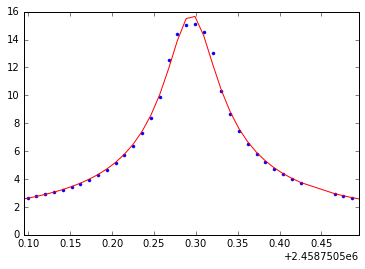

In [212]:
dt = 0.1
plt.plot(xdata, ydata, 'b.')
plt.plot(xdata, PSPL_A, 'r-')
plt.xlim(result2['t0']- dt*2, result2['t0']+dt*2)

In [213]:
# def bell_curve(x,c,a,b,d,e):
#     """Function describing a bell curve of the form:
#     f(x; a,b,c,d) = d / [1 + |(x-c)/a|^(2b)]
    
#     Inputs:
#     :param  np.array x: Series of intervals at which the function should
#                         be evaluated
#     :param float a,b,c: Coefficients of the bell curve function
    
#     Returns:
#     :param np.array f(x): Series of function values at the intervals in x
#     """
    
#     fx = d / ( 1.0 + (abs( (e*x-c)/a ))**(2.0*b) )
    
#     return fx+1

# def bell_curve_data(params, t, A_data):
#     """Function describing a bell curve of the form:
#     f(x; a,b,c,d) = d / [1 + |(x-c)/a|^(2b)]
    
#     Inputs:
#     :param  np.array x: Series of intervals at which the function should
#                         be evaluated
#     :param float a,b,c: Coefficients of the bell curve function
    
#     Returns:
#     :param np.array f(x): Series of function values at the intervals in x
#     """
#     c = params['t0'].value
#     a = params['tE'].value
#     b = params['b'].value
#     d = params['amp'].value
#     e = params['e'].value
    
#     fx = (d / ( 1.0 + (abs( (e*t-c)/a ))**(2.0*b) ))
    
#     return fx+1 - A_data

In [214]:
temp_bell = [[], []]
for tE in tE_true:

    params = Parameters()
    params.add('t0', value= result2['t0'], min=result2['t0']-10, max=result2['t0']+10)
    params.add('tE', value= tE, min=0.00001, max=10000)
    params.add('b', value= 1, min=0, max=20)
    params.add('amp', value= A_max, min=1, max=100)
#     params.add('e', value= 2, min=0.1, max=4)


    res1 = minimize(bell_curve_data, params, args=(xdata.values, ydata ))
    temp_bell[0].append(res1.params)
    temp_bell[1].append(res1.chisqr)

result1 = temp_bell[0][np.argmin(temp_bell[1])]
print result1
bellcurve_A = bell_curve(xdata, result1['t0'], result1['tE'] ,result1['b'], result1['amp'])



Parameters([('t0', <Parameter 't0', 2458750.7946469653, bounds=[2458740.794669997:2458760.794669997]>), ('tE', <Parameter 'tE', 0.05082000304078478, bounds=[1e-05:10000]>), ('b', <Parameter 'b', 0.8177391238930454, bounds=[0:20]>), ('amp', <Parameter 'amp', 14.897151231061292, bounds=[1:100]>)])


(2458750.1946469652, 2458751.3946469654)

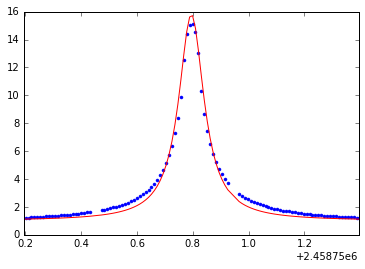

In [226]:
dt = 0.3
plt.plot(xdata, ydata, 'b.')
plt.plot(xdata, bell_curve(xdata, result1['t0'], 0.055 ,1, 14.8), 'r-')
plt.xlim(result1['t0']- dt*2, result1['t0']+dt*2)

In [196]:
c = result2['tE']*result2['u0']

t_top = df['t'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
A_top = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
model_top = PSPL_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

chisqr_PSPL = np.sum((df['A'].values-PSPL_A)**2)

chisqr_PSPL_err = cal_chisqr(PSPL_A, df['A'].values, df['A_err'].values)
chisqr_PSPL_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
chisqr_PSPL_top_reduced = chisqr_PSPL_top/len(model_top)

In [197]:
A_top = df['A'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
model_top = bellcurve_A[(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]
A_err_top = df['A_err'][(df.t < result2['t0'] + c) & (df.t > result2['t0'] - c)]

chisqr_bell = np.sum((df['A'].values-bellcurve_A)**2)
chisqr_bell_err = cal_chisqr(bellcurve_A, df['A'].values, df['A_err'].values)
chisqr_bell_top = cal_chisqr(model_top, A_top.values, A_err_top.values)
chisqr_bell_top_reduced = chisqr_bell_top/(len(model_top))


In [72]:
print chisqr_PSPL_err, chisqr_bell_err
print chisqr_PSPL_top_reduced, chisqr_bell_top_reduced

38614.894353596355 259739.12632662783
0.7042901866588137 254.8637126095441


In [73]:
chisqr_PSPL_top_reduced - chisqr_bell_top_reduced

-254.15942242288529

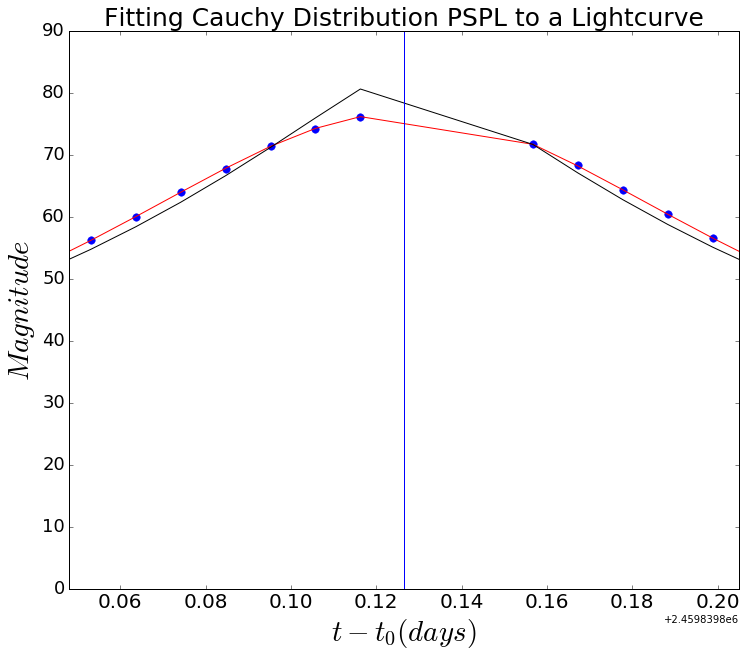

In [74]:
dtt = result2['tE']*result2['u0']                                                        

plt.figure()
plt.title('Fitting Cauchy Distribution PSPL to a Lightcurve', size=25)
plt.xlabel('$t - t_0 (days)$',size=29)
plt.ylabel('$Magnitude$',size=29)
plt.tick_params(axis='y',labelsize=18)
plt.tick_params(axis='x',labelsize=20)
plt.plot(df['t'], df['A'], 'b.', markersize=15)
#print param['t_eff=5']
plt.plot(df['t'], PSPL_A, 'r-')
plt.plot(df['t'], bellcurve_A, 'k-')
plt.axvline(result1['t0'].value)


plt.xlim(result2['t0'].value-dtt, result2['t0'].value+dtt)
# plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Trapezoid_FFP.png')

In [79]:
df, baseline, event, topright_len, topleft_len,result1, result2, chisqr_bell, chisqr_bell_err,\
chisqr_PSPL, chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top,\
chisqr_bell_top_reduced, chisqr_PSPL_top_reduced = Calculate_PSPL_minus_Cauchy(t, m, e)

In [80]:
delta_chisqr_bell_err = chisqr_PSPL_err-chisqr_bell_err

In [81]:
delta_chisqr_top_reduced =  chisqr_PSPL_top_reduced - chisqr_bell_top_reduced

In [82]:
result1

name,value,standard error,relative error,initial value,min,max,vary
t0,2459839.32,0.05660854,0.00%,,2458346.51,2460059.24,True
tE,1.96725818,0.24275325,12.34%,,1.0000e-04,1000.00000,True
b,0.75545211,0.01340691,1.77%,1,0.00000000,20.0000000,True
amp,8.42299949,0.18632139,2.21%,20,0.00000000,20.0000000,True


In [83]:
result2

name,value,standard error,relative error,initial value,min,max,vary
t0,2459839.93,8.4977e-06,0.00%,2459839.905763,2458346.51,2460059.24,True
tE,10.0348285,0.00925151,0.09%,1.0,1.0000e-03,1000.00000,True
u0,0.00781733,7.7050e-06,0.10%,0.006791898364723771,0.00000000,5.00000000,True
fs,0.59718785,5.8073e-04,0.10%,0.5,0.00000000,1.00000000,True


In [84]:
result2['tE']*result2['u0']

0.07844554449708856

-73651.95027667464


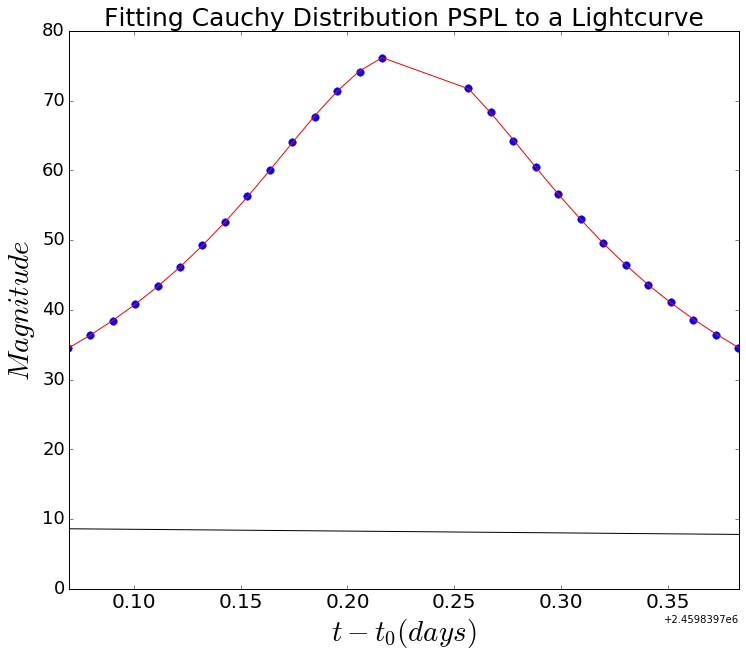

In [85]:
dtt = 2*result2['tE']*result2['u0']

PSPL_A = PSPL(result2['t0'],result2['tE'],result2['u0'],
              result2['fs'], df['t'])
bellcurve_A = bell_curve(df['t'], result1['t0'].value, 
                                                              result1['tE'].value , result1['b'].value,
                                                              result1['amp'].value)
print chisqr_PSPL - chisqr_bell

plt.figure()
plt.title('Fitting Cauchy Distribution PSPL to a Lightcurve', size=25)
plt.xlabel('$t - t_0 (days)$',size=29)
plt.ylabel('$Magnitude$',size=29)
plt.tick_params(axis='y',labelsize=18)
plt.tick_params(axis='x',labelsize=20)
plt.plot(df['t'], df['A'], 'b.', markersize=15)
#print param['t_eff=5']
plt.plot(df['t'], PSPL_A, 'r-')
plt.plot(df['t'], bellcurve_A, 'k-')
plt.axvline(result1['t0'].value)


plt.xlim(result2['t0'].value-dtt, result2['t0'].value+dtt)
# plt.gca().invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Trapezoid_FFP.png')

In [ ]:
info.loc[info.name == name, 't0_bell'] = result1['t0'].value  
info.loc[info.name == name, 'tE_bell'] = result1['tE'].value  
info.loc[info.name == name, 'chisqr_bell'] = chisqr_bell  
info.loc[info.name == name, 'chisqr_bell_err'] = chisqr_bell_err  
info.loc[info.name == name, 'chisqr_bell_top'] = chisqr_bell_top  
info.loc[info.name == name, 'chisqr_bell_top_reduced'] = chisqr_bell_top_reduced  
info.loc[info.name == name, 'delta_chisqr_top_reduced'] = delta_chisqr_top_reduced  
info.loc[info.name == name, 'b_bell'] = result1['b'].value  
info.loc[info.name == name, 'amp_bell'] = result1['amp'].value  











In [737]:
# plt.figure()
# ax = plt.gca()
# peak = result2['t0']
# #plt.title('Fitting Cauchy Distribution PSPL to a Lightcurve', size=25)
# plt.xlabel('$t - t_0 $'+' (days)',size=29)
# plt.ylabel('Magnitude',size=29)
# plt.tick_params(axis='y',labelsize=18)
# plt.tick_params(axis='x',labelsize=20)
# plt.plot(t[event]-peak, m[event], '.', color='#1f78b4', markersize=15, alpha=0.8)
# #ax.set_yticklabels(ax.get_yticklabels(), rotation = 90, fontsize = 22)
# plt.plot(t[event]-peak, PSPL_m[event], '-',color='#e31a1c', linewidth=3, label = 'PSPL Fit')
# plt.plot(t[event]-peak, bellcurve_m[event],'-', color='#ff7f00', linewidth=3, label = 'Cauchy Fit')

# plt.xlim(-25,45)
# plt.gca().invert_yaxis()
# plt.legend(loc = 'upper right' ,prop={'size': 25})

# # inset = plt.axes([0.17, 0.58, 0.3, 0.3])
# # inset.plot(t[event]-peak, m[event], '.', color='gray', markersize=15)
# # inset.plot(t[event]-peak, PSPL_m[event], 'r-', linewidth=1)
# # inset.plot(t[event]-peak, bellcurve_m[event], 'g-', linewidth=1)
# # # inset.set_yticklabels(inset.get_yticklabels(), rotation = 90, fontsize = 22)
# # inset.axes.get_yaxis().set_ticks([18.05,18.0,17.95])
# # #mark_inset(ax, inset, loc1=1, loc2=4, fc="none", ec="0.5")


# #x1, x2, y1, y2 = 

# inset.set_xlim (-0.05,0.05)#(x1,x2)
# inset.set_ylim (20.36,20.30)

# #plt.axvline(PSPL_init_par[0])


# fig = plt.gcf()
# fig.set_size_inches(12.0,10.0)
# # fig.savefig('Cauchy_fit_example.png')

In [525]:
# Path to the larger dataset
home = os.path.expanduser("~")

temp = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'#lc/'
direc = os.listdir(temp)

In [526]:
#Fitting Cauchy to Data Challenge light curves


direc.sort()
result = {'name':[], 't0_bell':[], 'tE_bell':[], 'b_bell':[],'amp_bell':[],
          'chisqr_bell':[],'chisqr_bell_err':[], 'chisqr_bell_top':[],'chisqr_bell_top_reduced':[], 't0_PSPL':[], 'tE_PSPL':[],
          'u0_PSPL':[],'fs_PSPL':[], 'base_PSPL':[], 'chisqr_PSPL':[],'chisqr_PSPL_err':[],'chisqr_PSPL_top': [], 'chisqr_PSPL_top_reduced': [],
          'xdata': [], 'ydata': [], 'yerr': [], 'event': []}
c = 0 

for f in tqdm(direc):
    #print f
    
    if  f.endswith('.W149') and f.startswith('mag.'):
        
        
#         print c
        c = c +1
        
        try:
            t,m,e = np.loadtxt(temp+str(f),unpack=True, usecols=(0,1, 2))


            

            df, baseline, event, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL, \
            chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top, chisqr_bell_top_reduced, chisqr_PSPL_top_reduced  = Calculate_PSPL_minus_Cauchy(t, m, e)
           
        
            result['name'].append(f)
            result['t0_bell'].append(result1['t0'].value)
            result['tE_bell'].append(result1['tE'].value)
            result['b_bell'].append(result1['b'].value)
            result['amp_bell'].append(result1['amp'].value)
            result['chisqr_bell'].append(chisqr_bell)
            result['chisqr_bell_err'].append(chisqr_bell_err)
            result['chisqr_bell_top'].append(chisqr_bell_top)
            result['chisqr_bell_top_reduced'].append(chisqr_bell_top_reduced)
            result['t0_PSPL'].append(result2['t0'].value)
            result['tE_PSPL'].append(result2['tE'].value)
            result['u0_PSPL'].append(result2['u0'].value)
            result['fs_PSPL'].append(result2['fs'].value)
            result['base_PSPL'].append(result2['base'].value)
            result['chisqr_PSPL'].append(chisqr_PSPL)
            result['chisqr_PSPL_err'].append(chisqr_PSPL_err)
            result['chisqr_PSPL_top'].append(chisqr_PSPL_top)
            result['chisqr_PSPL_top_reduced'].append(chisqr_PSPL_top_reduced)
            result['xdata'].append(t)
            result['ydata'].append(m)
            result['yerr'].append(e)
            
            
        except (RuntimeError, TypeError, NameError, ValueError):
            traceback.print_exc()
            pass
#     if c == 4:
#         break

print 'done'










  0%|          | 0/9948 [00:00<?, ?it/s]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:91: RuntimeWarning: invalid value encountered in double_scalars
 58%|█████▊    | 5726/9948 [4:53:44<3:36:35,  3.08s/it]Traceback (most recent call last):
  File "<ipython-input-526-f3d01ec31f05>", line 26, in <module>
    df, baseline, event, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL,             chisqr_PSPL_err, chisqr_bell_top, chisqr_PSPL_top, chisqr_bell_top_reduced, chisqr_PSPL_top_reduced  = Calculate_PSPL_minus_Cauchy(t, m, e)
  File "<ipython-input-524-edcf9c7c4d93>", line 33, in Calculate_PSPL_minus_Cauchy
    res2 = minimize(PSPL_data, params2, args=(df['t'].values, df['magnitude'].values))
  File "/Users/Research/Library/Enthought/Canopy_64bit/User/lib/py

done


In [527]:
info1 = pd.read_csv('answer_keys/ombin.CSV')
info2 = pd.read_csv('answer_keys/omcassan.CSV')
info3 = pd.read_csv('answer_keys/dccv.CSV')
info4 = pd.read_csv('answer_keys/dcnormffp.CSV')

In [528]:
frames = [info1, info2, info3, info4]

info = pd.concat(frames)

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [529]:
# info = info.rename(columns={"index": "name"})

In [530]:
info = info.reset_index()

In [531]:
for i in range(len(result['name'])):

    if result['name'][i].split('.lc')[0].endswith('all'): 
        result['name'][i] = result['name'][i].split('all')[0]+'det'+result['name'][i].split('all')[1]

In [532]:

c = 0
x = info.name
y = result['name']
for j in range(len(x)):
    
    if not x[j] in y:
        info = info.drop([j])
        c = c + 1
print c
        



436


In [556]:
info = info.drop(['level_0', 'index'], axis=1)

In [559]:
info = info.reset_index()

In [560]:
info['type'] = np.zeros(len(info))

for i in tqdm(range(len(info))):
    
    if info['name'][i].split('mag')[1].startswith('.ombin'):
        
        info.set_value(i, 'type', 1)
        
    if info['name'][i].split('mag')[1].startswith('.dccv'):
        
        info.set_value(i, 'type', 0)
        
    if info['name'][i].split('mag')[1].startswith('.dcnormffp'):
        
        info.set_value(i, 'type', 3)
        
    if info['name'][i].split('mag')[1].startswith('.omcassan'):
        
        info.set_value(i, 'type', 2)

100%|██████████| 5578/5578 [00:00<00:00, 12794.69it/s]


In [535]:
info['t0_bell'] = np.zeros(len(info))
info['tE_bell'] = np.zeros(len(info))
info['chisqr_bell'] = np.zeros(len(info))
info['chisqr_bell_err'] = np.zeros(len(info))
info['chisqr_bell_top'] = np.zeros(len(info))
info['chisqr_bell_top_reduced'] = np.zeros(len(info))
info['b_bell'] = np.zeros(len(info))
info['amp_bell'] = np.zeros(len(info))
info['t0_PSPL'] = np.zeros(len(info))
info['tE_PSPL'] = np.zeros(len(info))
info['u0_PSPL'] = np.zeros(len(info))
info['fs_PSPL'] = np.zeros(len(info))
# info['fb_PSPL'] = np.zeros(len(info))
info['base_PSPL'] = np.zeros(len(info))
info['chisqr_PSPL'] = np.zeros(len(info))
info['chisqr_PSPL_err'] = np.zeros(len(info))
info['chisqr_PSPL_top'] = np.zeros(len(info))
info['chisqr_PSPL_top_reduced'] = np.zeros(len(info))





for i in range(len(result['name'])):
    #print i
    
    info.loc[info.name == result['name'][i],'t0_bell'] = result['t0_bell'][i]-2458234
    info.loc[info.name == result['name'][i],'tE_bell'] = result['tE_bell'][i]
    info.loc[info.name == result['name'][i],'b_bell'] = result['b_bell'][i]
    info.loc[info.name == result['name'][i],'amp_bell'] = result['amp_bell'][i]
    info.loc[info.name == result['name'][i], 't0_PSPL'] = result['t0_PSPL'][i]-2458234
    info.loc[info.name == result['name'][i], 'tE_PSPL'] = result['tE_PSPL'][i]
    info.loc[info.name == result['name'][i], 'u0_PSPL'] = result['u0_PSPL'][i]
    info.loc[info.name == result['name'][i], 'fs_PSPL'] = result['fs_PSPL'][i]
#     info.loc[info.name == result['name'][i], 'fb_PSPL'] = result['fb_PSPL'][i].value
    info.loc[info.name == result['name'][i], 'chisqr_bell'] = result['chisqr_bell'][i]
    info.loc[info.name == result['name'][i], 'chisqr_PSPL'] = result['chisqr_PSPL'][i]
    info.loc[info.name == result['name'][i], 'chisqr_PSPL_err'] = result['chisqr_PSPL_err'][i]
    info.loc[info.name == result['name'][i], 'chisqr_PSPL_top'] = result['chisqr_PSPL_top'][i]
    info.loc[info.name == result['name'][i], 'chisqr_PSPL_top_reduced'] = result['chisqr_PSPL_top_reduced'][i]
    info.loc[info.name == result['name'][i], 'chisqr_bell_err'] = result['chisqr_bell_err'][i]
    info.loc[info.name == result['name'][i], 'chisqr_bell_top'] = result['chisqr_bell_top'][i]
    info.loc[info.name == result['name'][i], 'chisqr_bell_top_reduced'] = result['chisqr_bell_top_reduced'][i]



    

print 'done'

done


In [536]:
info['delta_chisqr_err'] = info.chisqr_PSPL_err - info.chisqr_bell_err
info['delta_chisqr_top'] = info.chisqr_PSPL_top - info.chisqr_bell_top
info['delta_chisqr'] = info.chisqr_PSPL - info.chisqr_bell
info['delta_chisqr_top_reduced'] = info.chisqr_PSPL_top_reduced - info.chisqr_bell_top_reduced
info['tE_eff'] = info.tE * info.u0
info['tE_eff_exp'] = info.tE_PSPL * info.u0_PSPL
info['tE_bell_PSPL_ratio'] = np.abs(info.tE_bell/info.tE_PSPL)
info['delta_t_true_PSPL'] = np.abs(info.t0-info.t0_PSPL)
info['delta_t_true_bell'] = np.abs(info.t0-info.t0_bell)
info['delta_t_PSPL_bell'] = np.abs(info.t0_PSPL-info.t0_bell)

In [902]:
# info.to_csv('test_result/Cauchy/Cauchy_alllc_results_V2.CSV')

In [90]:
info = pd.read_csv('test_result/Cauchy/Cauchy_alllc_results_V2.CSV')

In [352]:
# # General format for plotting different parameters versus each other 

# fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# x = 'chisqr_bell_top_reduced'
# y = 'chisqr_PSPL_top_reduced'
# c_y = 1
# c_x = 1#2.0/(38568-7)

# axs[0,0].plot(c_x*(info[x][info['type']==0]).astype(float).abs(),c_y*(info[y][info['type']==0]).astype(float).abs(), '.',markersize=18, label= 'CV',color='r')
# axs[0,0].grid()
# axs[0,0].legend()
# axs[0,1].plot(c_x*(info[x][info['type']==1]).astype(float).abs(),c_y*(info[y][info['type']==1]).astype(float).abs(), '.',markersize=18, label= 'Binary', color='g')
# #axs[0,1].plot(c_x*(info[x][info['type']==1]).astype(float).abs(),c_x*(info[x][info['type']==1]).astype(float).abs(), 'r-')
# axs[0,1].grid()
# axs[0,1].legend()
# axs[1,0].plot(c_x*(info[x][info['type']==2]).astype(float).abs(),c_y*(info[y][info['type']==2]).astype(float).abs(), '.',markersize=18, label= 'Planetary',  color = 'orange')
# #axs[1,0].plot(c_x*(info[x][info['type']==2]).astype(float).abs(),c_x*(info[x][info['type']==2]).astype(float).abs(), 'g-')
# axs[1,0].grid()
# axs[1,0].legend()
# axs[1,1].plot(c_x*(info[x][info['type']==3]).astype(float).abs(),c_y*(info[y][info['type']==3]).astype(float).abs(), '.',markersize=18, label= 'PSPL/FFP', color='blue')
# axs[1,1].plot(c_x*(info[x][info['type']==3]).astype(float).abs(),c_x*(info[x][info['type']==3]).astype(float).abs(), 'r-')
# axs[1,1].grid()
# axs[1,1].legend()


# axs[0, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
# axs[0, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off',length=0)

# axs[0, 0].tick_params(axis='y',which='both', labelsize=12)
# axs[1, 0].tick_params(axis='both',which='both', labelsize=12)
# axs[1, 1].tick_params(axis='x',which='both', labelsize=12)

# plt.yscale('log')
# plt.xscale('log')



# axs[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
# axs[1, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off', length=0)

# xlim = (1e-4,5)
# ylim = (0.1,20)

# # axs[0,0].set_ylim(ylim)
# # axs[0,1].set_ylim(ylim)
# # axs[1,0].set_ylim(ylim)
# # axs[1,1].set_ylim(ylim)
# # axs[0,0].set_xlim(xlim)
# # axs[1,0].set_xlim(xlim)
# # axs[0,1].set_xlim(xlim)
# # axs[1,1].set_xlim(xlim)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                     wspace=0.05, hspace=0.08) 

# fig.text(0.5, 0.02, x, ha='center',size=30)
# fig.text(0.02, 0.5, y, va='center', rotation='vertical',size=30)

# fig = plt.gcf()
# fig.set_size_inches(20.0,15.0)
# #fig.savefig('a4-a2.png')

In [351]:
# x = 'tE_bell'
# y = 'delta_chisqr_top'
# rho_lim = 0.01

# fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

# ttl = axs[0].set_title('$Events \;\; with \;\; {{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} > 0$', size =32)
# ttl.set_position([.5, 1.01])

# axs[0].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr>0) ]), 
#          np.abs(info[y][(info.type==3)& (info.delta_chisqr>0) ]), 'b.', markersize = 20, 
#             label='All events with ${{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} > 0$')
# axs[0].plot(np.abs(info[x][(info.type==3)  & (info.rho<rho_lim)& (info.delta_chisqr>0)]), 
#          np.abs(info[y][(info.type==3) &  (info.rho<rho_lim)& (info.delta_chisqr>0)]), 
#             'r.', markersize = 20, label = r'$\rho < 0.01$')

# axs[0].set_xscale('log')
# axs[0].set_yscale('log')
# axs[0].set_xticklabels(['', '','${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
#                         '${10}^0$', '${10}^1$', '${10}^2$', ''],
#                           rotation = 0, fontsize =25)
# axs[0].tick_params(axis='y',which='both', left = True)


# axs[0].set_yticklabels(['', '','${10}^{-6}$','${10}^{-5}$','${10}^{-4}$',
#                         '${10}^{-3}$', '${10}^{-2}$', '${10}^{-1}$', 
#                         '${10}^0$','${10}^1$',''], rotation = 90, fontsize =25)
# # axs[0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2, 1e3])
# axs[0].grid()
# axs[0].legend(loc='lower center', ncol=1, mode="expand",numpoints=1, shadow=True, fancybox=True,prop={'size': 25})

# ttl = axs[1].set_title('$Events \;\; with \;\; {{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} < 0$', size =32)
# ttl.set_position([.5, 1.01])

# axs[1].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr<0) ]), 
#          np.abs(info[y][(info.type==3)& (info.delta_chisqr<0) ]), 'b.', markersize = 20,
#            label='All events with ${{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} < 0$')
# axs[1].plot(np.abs(info[x][(info.type==3)  & (info.rho<rho_lim)& (info.delta_chisqr<0)]), 
#          np.abs(info[y][(info.type==3) &  (info.rho<rho_lim)& (info.delta_chisqr<0)]), 
#             'r.', markersize = 20, label = r'$\rho < 0.01$')

# axs[1].legend(loc='best', ncol=1, mode="expand",numpoints=1, shadow=True, fancybox=True, prop={'size': 25})
# axs[1].set_xscale('log')
# axs[1].set_yscale('log')

# axs[1].set_xticklabels(['','','${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
#                         '${10}^0$', '${10}^1$', '${10}^2$', ''],
#                           rotation = 0, fontsize =25)
# # axs[0].set_yticklabels(['', '','${10}^{-6}$','${10}^{-5}$','${10}^{-4}$',
# #                         '${10}^{-3}$', '${10}^{-2}$', '${10}^{-1}$', 
# #                         '${10}^0$','${10}^1$',''], rotation = 0, fontsize =20)
# # axs[1].tick_params(axis='both',which='both', labelsize=20)

# axs[1].tick_params(axis='y',which='both', left=True,labelleft='off')
# axs[1].set_yticklabels(['', '','${10}^{-6}$','${10}^{-5}$','${10}^{-4}$',
#                         '${10}^{-3}$', '${10}^{-2}$', '${10}^{-1}$', 
#                         '${10}^0$','${10}^1$',''], rotation = 90, fontsize =25)
# axs[1].grid()
# plt.subplots_adjust(left=None, bottom=0.08, right=None, top=None,
#                     wspace=0.0, hspace=0.5) 

# fig.text(0.5, 0.02, '$Estimated \;\; t_E$', ha='center',size=35)
# fig.text(0.02, 0.5, '${{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy}$', va='center', rotation='vertical',size=35)
# fig = plt.gcf()
# fig.set_size_inches(20.0,15.0)
# # fig.savefig('Cauchy_delta_chi_versus_tE.png')

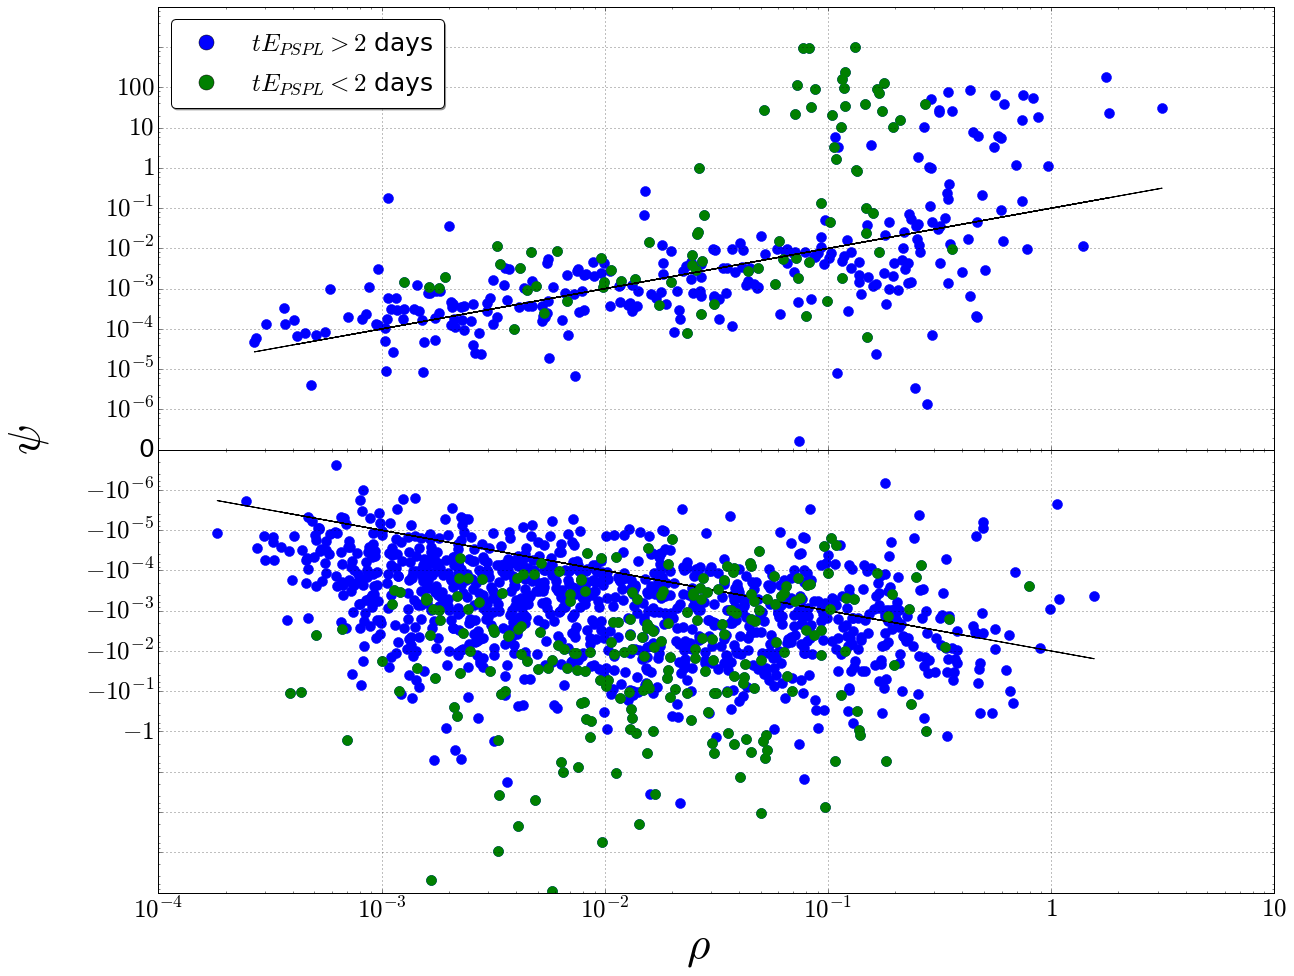

In [546]:
x = 'rho'
y = 'delta_chisqr_top_reduced'
z_lim = 0.5
z = 'tE_eff'
c = info[z][(info.type==3)]
#c[(info.delta_chisqr_top_reduced<0) & (info[z]>z_lim)] & c[(info.delta_chisqr_top_reduced>0) & (info[z]>z_lim)]
legend_elements = []

fig, axs = plt.subplots(2, 1, sharex=True)


axs[0].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced>0) ]), 
         np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced>0) ]), 'b.', markersize = 20, 
            label='$All$')
axs[0].plot(np.abs(info[x][(info.type==3)  & (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced>0)& (info.b_bell<1)]), 
         np.abs(info[y][(info.type==3) &  (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced>0)& (info.b_bell<1)]), 
            'g.', markersize = 20, label = '${t_E}_{fitted} < 2$')
axs[0].plot(np.abs(info[x][(info.type==3)&(info.delta_chisqr_top_reduced>0)& (info.b_bell>1)]), 
         np.abs(info[x][(info.type==3)& (info.delta_chisqr_top_reduced>0)& (info.b_bell>1)]), 
            'k-')
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='${tE}_{ PSPL} > 2$'+ ' days',
                          markerfacecolor='b', markersize=15))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='${tE}_{ PSPL} < 2$'+ ' days',
                          markerfacecolor='g', markersize=15))
# axs[0].plot(np.abs(info[x][(info.type==3)  & (info[z]<0.05)& (info.delta_chisqr>0)]), 
#          np.abs(info[y][(info.type==3) &  (info[z]<0.05)& (info.delta_chisqr>0)]), 
#             'k.', markersize = 20, label = '${t_E}_{fitted} < 1$')

# print float(len(info[x][(info.type==3)  & (info['rho']>0.01)& (info.delta_chisqr>0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr>0) ]))
# print float(len(info[x][(info.type==3)  & (info[z]<z_lim)& (info.delta_chisqr>0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr>0) ]))


axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xticklabels(['', '','${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
#                         '${10}^0$', '${10}^1$', '${10}^2$', ''],
#                           rotation = 0, fontsize =25)
# axs[0].tick_params(axis='y',which='both', left = True)


axs[0].set_yticklabels(['', '','${10}^{-6}$','${10}^{-5}$','${10}^{-4}$',
                        '${10}^{-3}$', '${10}^{-2}$', '${10}^{-1}$', 
                        '$1$','$10$','$100$', ''], rotation = 0, fontsize =25)
# # axs[0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2, 1e3])
axs[0].grid()
# axs[0].legend(bbox_to_anchor=(1.02, 0., 1.03, 1.),handles=legend_elements, loc='right',
#            ncol=1, mode="expand", borderaxespad=0. ,prop={'size': 22})


# ttl = axs[1].set_title('$Events \;\; with \;\; {{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} < 0$', size =32)
# ttl.set_position([.5, 1.01])

axs[1].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced<0) ]), 
         np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced<0) ]), 'b.', markersize = 20,
           label='$All$')
axs[1].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced<0)]), 
         np.abs(info[x][(info.type==3)& (info.delta_chisqr_top_reduced<0)]), 'k-', markersize = 20)
axs[1].plot(np.abs(info[x][(info.type==3)  & (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced<0)& (info.b_bell<1)]), 
         np.abs(info[y][(info.type==3) &  (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced<0)& (info.b_bell<1)]), 
            'g.', markersize = 20, label = '${t_E}_{fitted} < 2$'+ ' days')
# axs[1].plot(np.abs(info[x][(info.type==3)  & (info[z]<0.05)& (info.delta_chisqr<0)]), 
#          np.abs(info[y][(info.type==3) &  (info[z]<0.05)& (info.delta_chisqr<0)]), 
#             'k.', markersize = 20, label = '${t_E}_{fitted} < 1$')

axs[0].legend(handles=legend_elements, loc='upper left', ncol=1,numpoints=1, shadow=True, fancybox=True, prop={'size': 25})

axs[1].set_xscale('log')
axs[1].set_yscale('log')
# axs[1].set_ylim(0.01,10)
axs[1].invert_yaxis()
axs[1].set_xticklabels(['','${10}^{-4}$', '${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
                        '$1$','$10$'],
                          rotation = 0, fontsize =25)
axs[1].set_yticklabels(['', '0','$-{10}^{-6}$','$-{10}^{-5}$','$-{10}^{-4}$',
                        '$-{10}^{-3}$', '$-{10}^{-2}$', '$-{10}^{-1}$', 
                        '$-1$',''], rotation = 0, fontsize =25)
# axs[1].set_xlim(1e-4, 5)
axs[1].grid()

# print float(len(info[x][(info.type==3)  & (info['rho']>0.01)& (info.delta_chisqr<0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr<0) ]))
# print float(len(info[x][(info.type==3)  & (info[z]<z_lim)& (info.delta_chisqr<0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr<0) ]))


plt.subplots_adjust(left=None, bottom=0.08, right=None, top=None,
                    wspace=0.0, hspace=0.0) 

fig.text(0.5, 0.02, r'$\rho$', ha='center',size=45)
fig.text(0.02, 0.5, '$\psi$', va='center', rotation='vertical',size=45)
fig = plt.gcf()
fig.set_size_inches(20.0,15.0)
# fig.savefig('Cauchy_delta_chi_rho_temp.png')

(array([ 78., 194.,  59.,  16.,   5.,   2.,   0.,   1.,   0.,   1.]),
 array([0.656527  , 0.9735811 , 1.2906352 , 1.60768931, 1.92474341,
        2.24179751, 2.55885161, 2.87590571, 3.19295981, 3.51001392,
        3.82706802]),
 <a list of 10 Patch objects>)

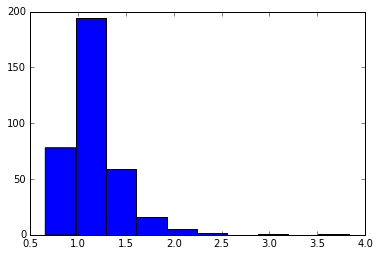

In [554]:
plt.hist(np.abs(info['b_bell'][(info.type==3) & (info[y]>0) ]))

(array([ 81., 312., 722., 123.,  11.,   2.,   0.,   0.,   0.,   1.]),
 array([0.59152909, 0.81160105, 1.031673  , 1.25174496, 1.47181691,
        1.69188887, 1.91196082, 2.13203278, 2.35210473, 2.57217669,
        2.79224864]),
 <a list of 10 Patch objects>)

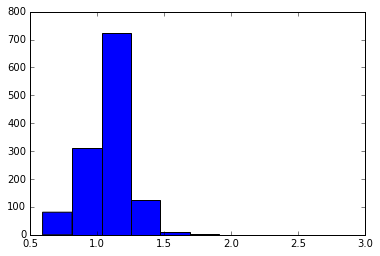

In [555]:
plt.hist(np.abs(info['b_bell'][(info.type==3) & (info[y]<0) ]))

In [880]:
med_med(np.log10(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced>0)& (info.b_bell>1) ])), 
         np.log10(np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced>0)& (info.b_bell>1) ])))

0.5164872744043745

In [881]:
med_med(np.log10(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced<0)& (info.b_bell>1) ])), 
         np.log10(np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced<0) & (info.b_bell>1)])))

0.6813901315028978

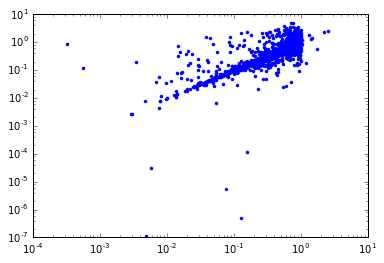

In [141]:
plt.plot(np.abs(info.u0[info.type==3]), np.abs(info.u0_PSPL[info.type==3]), 'b.')
plt.xscale('log')
plt.yscale('log')

In [511]:
info[['name','u0','u0_PSPL', 't0', 't0_PSPL', 't0_bell', 'delta_chisqr_top_reduced','delta_chisqr_err', 'tE','tE_bell','tE_PSPL','b_bell','rho', 'tE_eff']][(info.type==3) & (info[y]>0)& (np.abs(info[z])<1)]

,name,u0,u0_PSPL,t0,t0_PSPL,t0_bell,delta_chisqr_top_reduced,delta_chisqr_err,tE,tE_bell,tE_PSPL,b_bell,rho,tE_eff
3956,mag.dcnormffp_0_82_25.det.lc.W149,-0.537212,0.613338,1796.998932,1796.995333,1796.994438,0.092472,3.777897,0.232677,0.145188,0.214639,1.203483,0.031232,-0.124997
3959,mag.dcnormffp_0_82_28.det.lc.W149,-0.911618,1.977197,326.977006,326.972173,326.971516,0.017570,8.489397,0.859044,0.798141,0.495419,1.494159,0.024295,-0.783120
3968,mag.dcnormffp_0_82_40.det.lc.W149,0.084908,0.994805,1808.006167,1808.005056,1808.005240,0.013914,4.993298,0.021642,0.009388,0.008285,2.233388,0.346065,0.001838
3970,mag.dcnormffp_0_82_43.det.lc.W149,-0.014672,0.320665,334.883679,334.883641,334.883658,59.701663,313.445484,0.128474,0.017746,0.038988,1.099396,0.107742,-0.001885
3996,mag.dcnormffp_0_82_80.det.lc.W149,-0.089913,0.087503,547.917364,547.918612,547.918401,0.000631,-9.770540,0.071471,0.010080,0.060854,0.886470,0.149821,-0.006426
4003,mag.dcnormffp_0_82_87.det.lc.W149,0.325914,0.300626,1605.409952,1605.404715,1605.404381,0.037604,1.745210,0.264474,0.111071,0.279151,1.056880,0.023004,0.086196
4012,mag.dcnormffp_0_82_100.det.lc.W149,0.515307,1.345738,159.994979,159.997074,159.997229,0.000698,9.991757,0.018492,0.011510,0.009964,1.336561,0.292002,0.009529
4018,mag.dcnormffp_0_82_106.det.lc.W149,-0.279519,0.350442,1614.314724,1614.314686,1614.314496,60.598730,322.208445,0.067601,0.035618,0.058295,1.265783,0.467683,-0.018896
4025,mag.dcnormffp_0_82_115.det.lc.W149,-0.970047,0.648819,353.479204,353.476244,353.476400,0.021515,1.588662,0.966381,0.847208,1.205297,1.201855,0.008110,-0.937435
4030,mag.dcnormffp_0_82_121.det.lc.W149,-0.948430,1.817365,351.976905,351.959349,351.955712,0.056733,14.542982,0.292319,0.279056,0.175068,1.771587,0.100589,-0.277244


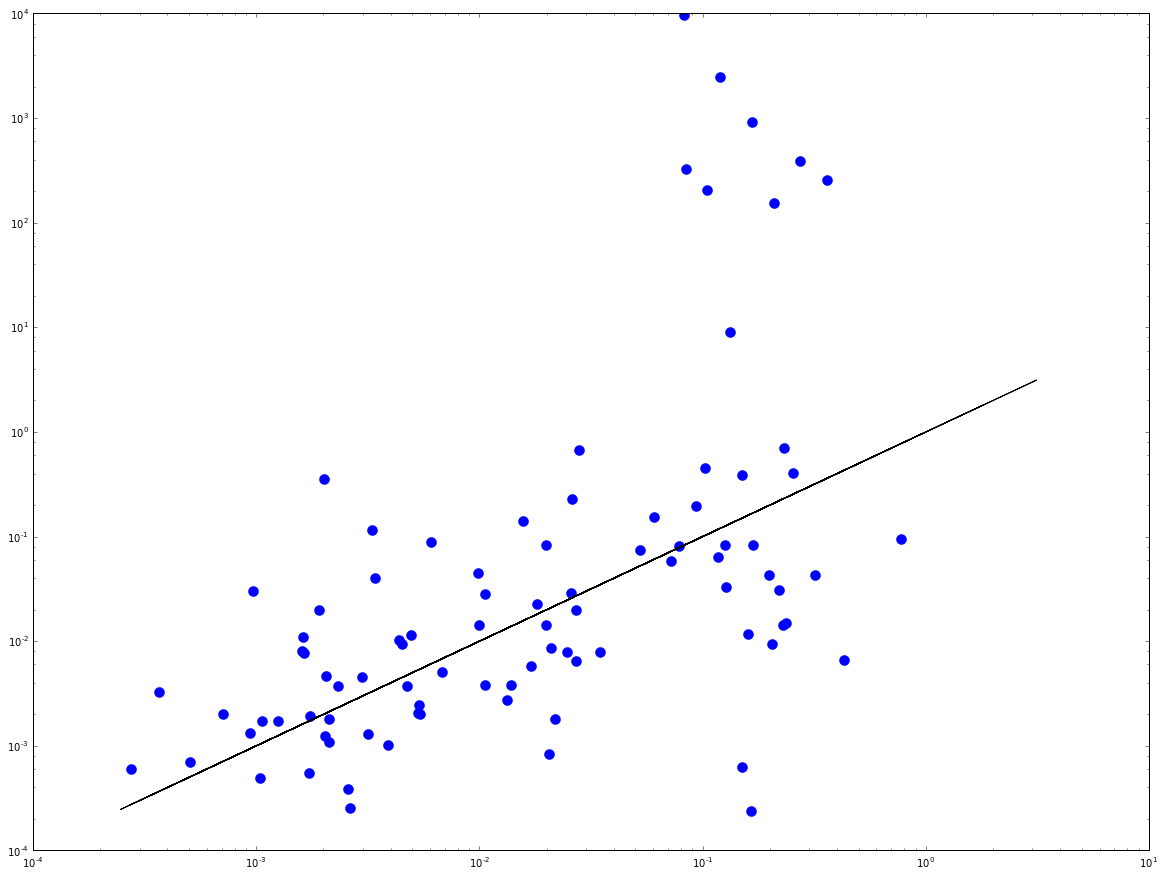

In [314]:
x = 'rho'
y = 'delta_chisqr_top_reduced'
z = 'delta_chisqr_err'
c = info['tE_PSPL'][(info.type==3)]

# x2= np.abs(info[x][(info.type==3) & (info[y]<0) & (info.b_bell>1)& (info.b_bell<3)]).values
# y2= np.abs(info[y][(info.type==3) & (info[y]<0) & (info.b_bell>1)& (info.b_bell<3)]).values
# z= np.abs(info['b_bell'][(info.type==3) & (info[y]<0) & (info.b_bell>1)& (info.b_bell<3)]).values

# df_n=pd.DataFrame(data={'A':x2,'B':y2,'C':z})

# points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="magma", lw=0,s=45, norm=matplotlib.colors.LogNorm())
# cbar=plt.colorbar(points)
# cbar.ax.set_ylabel('b Value', size=20)

# plt.xlim(1e-4,10)
# plt.ylim(1e-7,10)

plt.plot(np.abs(info[x][(info.type==3) & (info[y]>0)& (info[z]<0)]), 
         np.abs(info[y][(info.type==3) & (info[y]>0)& (info[z]<0)]), 'b.', markersize = 20, 
            label='$All$')
# plt.plot(np.abs(info[x][(info.type==3) & (info[y]>0)& (info.u0_PSPL<0.05)]), 
#          np.abs(info[y][(info.type==3) & (info[y]>0)&(info.u0_PSPL<0.05)]), 'r.', markersize = 20, 
#             label='$All$')
# plt.plot(np.abs(info[x][(info.type==3) & (np.abs(info[y])<info[x]/50) & (info.b_bell>1) ]), 
#          np.abs(info[y][(info.type==3) & (np.abs(info[y])<info[x]/50) & (info.b_bell>1)]), 'r.', markersize = 20, 
#             label='$All$')
# plt.plot(np.abs(info[x][(info.type==3) & (info[y]<0) & (info.b_bell>1.0)& (info.b_bell<1.2) ]), 
#          np.abs(info[y][(info.type==3) & (info[y]<0) & (info.b_bell>1.0)& (info.b_bell<1.2)]), 'k.', markersize = 20, 
#             label='$All$')
plt.plot(np.abs(info[x][(info.type==3) & (info.b_bell>1)]), 
         np.abs(info[x][(info.type==3) & (info.b_bell>1)]), 'k-')

# plt.plot(np.abs(info[x][(info.type==3)& (info.tE_PSPL<2)]), 
#          np.abs(info[y][(info.type==3) &  (info.tE_PSPL<2)]), 'g.', markersize = 20, 
#             label='$All$')
# & (np.abs(info[y])<10*info[x]) 
plt.xscale('log')
plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(20.0,15.0)

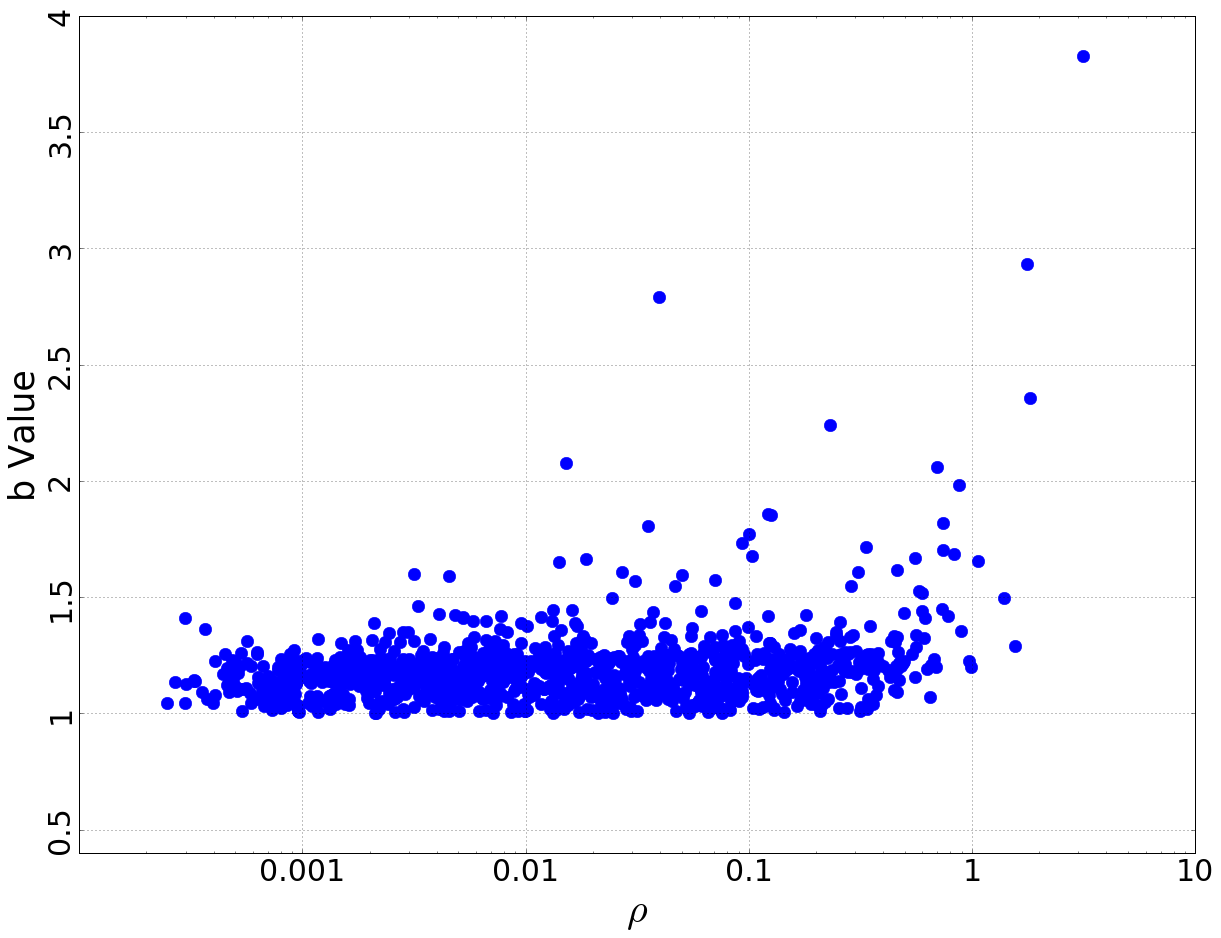

In [864]:
# plt.plot(info['rho'][(info.type==3) & (np.abs(info.t0-info.t0_bell)<5)& (info.b_bell<2)], 
#          info['b_bell'][(info.type==3) &(np.abs(info.t0-info.t0_bell)<5)& (info.b_bell<2)], 'b.', markersize=25)
plt.plot(info['rho'][(info.type==3) &  (info.b_bell>1) & (info.full_top == 1)], 
         info['b_bell'][(info.type==3) & (info.b_bell>1)& (info.full_top == 1)], 'b.', markersize=25)
# plt.plot(info['rho'][(info.type==3) &  (info.b_bell>1.3)], 
#          info['b_bell'][(info.type==3) & (info.b_bell>1.3)], 'r.', markersize=25)
plt.xscale('log')
# plt.yscale('log')

plt.xlabel(r'$\rho$',size = 40)
plt.ylabel('b Value', size= 35)
plt.ylim(0.4, 4)

plt.grid()
ax = plt.gca()
ax.set_yticklabels(['',0.5,1,1.5,2,2.5,3,3.5,4], rotation = 90, fontsize = 30)
ax.set_xticklabels(['','', 0.001, 0.01, 0.1, 1, 10], rotation = 0, fontsize = 30)



fig = plt.gcf()
fig.set_size_inches(20.0,15.0)
fig.savefig('b_vs_rho_V2.png')

In [231]:
# info[['name', 't0', 't0_bell', 'tE', 'tE_bell', 'rho', 'b_bell', 'delta_chisqr_top_reduced', 'full_top']][(info.type==3) & (info.b_bell >1.5) ]

# In the following cells, I have selected a few of the wrong results and repeated the fitting process for them.

In [8]:
temp_info = (info[(info.type==3) & ((info.t0-info.t0_bell)<10) & (info.b_bell>2) &(info.rho>0.01)])

In [697]:
# for f in temp_info.name:
    
#     t,m,e = np.loadtxt(temp+str(f),unpack=True, usecols=(0,1, 2))

#     f, baseline, event, result1, result2, chisqr_bell, chisqr_bell_err, chisqr_PSPL, chisqr_PSPL_err  = Calculate_PSPL_minus_Cauchy(t, m, e)
           

In [ ]:
for i in range(len(result['name'])):
    info.loc[info.name == result['name'][i], 'b_bell'] = result['b_bell'][i]

In [238]:
info.loc[info.name == 'mag.dcnormffp_0_82_949.det.lc.W149', 'delta_chisqr_top_reduced'] = -0.0042202689748871425  
# info.loc[info.name == 'mag.dcnormffp_0_82_1541.det.lc.W149', 'tE_trapezoid_ratio'] = 0.08987250870971625

In [728]:
info = info.drop(5243)

In [800]:
#List of good bellcurve shapes:
#mag.dcnormffp_0_82_1456.det.lc.W149

In [861]:
info['full_top'] = np.ones(len(info.name))
for f in info.name[info.type == 3]:
    print f
    t,m,e = np.loadtxt(temp+f,unpack=True, usecols=(0,1, 2))
    
    t0_bell = info.t0_bell[info.name == f].values[0]
    tE_PSPL = info.tE_PSPL[info.name == f].values[0]
    u0_PSPL = info.u0_PSPL[info.name == f].values[0]
    
#     print t0_bell, tE_PSPL, u0_PSPL

    right = len(t[(t>t0_bell+2458234) & (t<t0_bell+2458234+(tE_PSPL*u0_PSPL))])
    left = len(t[(t<t0_bell+2458234) & (t>t0_bell+2458234-(tE_PSPL*u0_PSPL))])
    print right, left
    
    if right == 0 or left == 0 or np.abs(left-right)>1000:
        
        info.loc[info.name == f, 'full_top'] = 0 
    
print 'done'

mag.dcnormffp_0_82_1.det.lc.W149
0 0
mag.dcnormffp_0_82_2.det.lc.W149
20 18
mag.dcnormffp_0_82_3.det.lc.W149
14 14
mag.dcnormffp_0_82_4.det.lc.W149
2 3
mag.dcnormffp_0_82_5.det.lc.W149
68 71
mag.dcnormffp_0_82_6.det.lc.W149
37 37
mag.dcnormffp_0_82_7.det.lc.W149
7 8
mag.dcnormffp_0_82_10.det.lc.W149
209 206
mag.dcnormffp_0_82_11.det.lc.W149
804 804
mag.dcnormffp_0_82_12.det.lc.W149
106 102
mag.dcnormffp_0_82_13.det.lc.W149
179 179
mag.dcnormffp_0_82_14.det.lc.W149
123 125
mag.dcnormffp_0_82_15.det.lc.W149
91 91
mag.dcnormffp_0_82_18.det.lc.W149
125 127
mag.dcnormffp_0_82_19.det.lc.W149
124 123
mag.dcnormffp_0_82_20.det.lc.W149
0 0
mag.dcnormffp_0_82_21.det.lc.W149
6 6
mag.dcnormffp_0_82_22.det.lc.W149
1 2
mag.dcnormffp_0_82_23.det.lc.W149
6 5
mag.dcnormffp_0_82_24.det.lc.W149
3 3
mag.dcnormffp_0_82_25.det.lc.W149
10 13
mag.dcnormffp_0_82_26.det.lc.W149
1 2
mag.dcnormffp_0_82_27.det.lc.W149
8 11
mag.dcnormffp_0_82_28.det.lc.W149
88 87
mag.dcnormffp_0_82_29.det.lc.W149
33 32
mag.dcnormff

In [ ]:
x = 'rho'
y = 'delta_chisqr_top_reduced'
z_lim = 0.5
z = 'tE_eff'
c = info[z][(info.type==3)]
#c[(info.delta_chisqr_top_reduced<0) & (info[z]>z_lim)] & c[(info.delta_chisqr_top_reduced>0) & (info[z]>z_lim)]
legend_elements = []

fig, axs = plt.subplots(2, 1, sharex=True)


axs[0].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced>0) ]), 
         np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced>0) ]), 'b.', markersize = 20, 
            label='$All$')
axs[0].plot(np.abs(info[x][(info.type==3)  & (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced>0)& (info.b_bell<1)]), 
         np.abs(info[y][(info.type==3) &  (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced>0)& (info.b_bell<1)]), 
            'g.', markersize = 20, label = '${t_E}_{fitted} < 2$')
axs[0].plot(np.abs(info[x][(info.type==3)&(info.delta_chisqr_top_reduced>0)& (info.b_bell>1)]), 
         np.abs(info[x][(info.type==3)& (info.delta_chisqr_top_reduced>0)& (info.b_bell>1)]), 
            'k-')
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='${tE}_{ PSPL} > 2$'+ ' days',
                          markerfacecolor='b', markersize=15))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='${tE}_{ PSPL} < 2$'+ ' days',
                          markerfacecolor='g', markersize=15))
# axs[0].plot(np.abs(info[x][(info.type==3)  & (info[z]<0.05)& (info.delta_chisqr>0)]), 
#          np.abs(info[y][(info.type==3) &  (info[z]<0.05)& (info.delta_chisqr>0)]), 
#             'k.', markersize = 20, label = '${t_E}_{fitted} < 1$')

# print float(len(info[x][(info.type==3)  & (info['rho']>0.01)& (info.delta_chisqr>0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr>0) ]))
# print float(len(info[x][(info.type==3)  & (info[z]<z_lim)& (info.delta_chisqr>0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr>0) ]))


axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xticklabels(['', '','${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
#                         '${10}^0$', '${10}^1$', '${10}^2$', ''],
#                           rotation = 0, fontsize =25)
# axs[0].tick_params(axis='y',which='both', left = True)


axs[0].set_yticklabels(['', '','${10}^{-6}$','${10}^{-5}$','${10}^{-4}$',
                        '${10}^{-3}$', '${10}^{-2}$', '${10}^{-1}$', 
                        '$1$','$10$','$100$', ''], rotation = 0, fontsize =25)
# # axs[0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2, 1e3])
axs[0].grid()
# axs[0].legend(bbox_to_anchor=(1.02, 0., 1.03, 1.),handles=legend_elements, loc='right',
#            ncol=1, mode="expand", borderaxespad=0. ,prop={'size': 22})


# ttl = axs[1].set_title('$Events \;\; with \;\; {{\chi}^2}_{PSPL} \; - \; {{\chi}^2}_{Cauchy} < 0$', size =32)
# ttl.set_position([.5, 1.01])

axs[1].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced<0) ]), 
         np.abs(info[y][(info.type==3)& (info.delta_chisqr_top_reduced<0) ]), 'b.', markersize = 20,
           label='$All$')
axs[1].plot(np.abs(info[x][(info.type==3) & (info.delta_chisqr_top_reduced<0)]), 
         np.abs(info[x][(info.type==3)& (info.delta_chisqr_top_reduced<0)]), 'k-', markersize = 20)
axs[1].plot(np.abs(info[x][(info.type==3)  & (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced<0)& (info.b_bell<1)]), 
         np.abs(info[y][(info.type==3) &  (np.abs(info[z])<z_lim)& (info.delta_chisqr_top_reduced<0)& (info.b_bell<1)]), 
            'g.', markersize = 20, label = '${t_E}_{fitted} < 2$'+ ' days')
# axs[1].plot(np.abs(info[x][(info.type==3)  & (info[z]<0.05)& (info.delta_chisqr<0)]), 
#          np.abs(info[y][(info.type==3) &  (info[z]<0.05)& (info.delta_chisqr<0)]), 
#             'k.', markersize = 20, label = '${t_E}_{fitted} < 1$')

axs[0].legend(handles=legend_elements, loc='upper left', ncol=1,numpoints=1, shadow=True, fancybox=True, prop={'size': 25})

axs[1].set_xscale('log')
axs[1].set_yscale('log')
# axs[1].set_ylim(0.01,10)
axs[1].invert_yaxis()
axs[1].set_xticklabels(['','${10}^{-4}$', '${10}^{-3}$','${10}^{-2}$','${10}^{-1}$',
                        '$1$','$10$'],
                          rotation = 0, fontsize =25)
axs[1].set_yticklabels(['', '0','$-{10}^{-6}$','$-{10}^{-5}$','$-{10}^{-4}$',
                        '$-{10}^{-3}$', '$-{10}^{-2}$', '$-{10}^{-1}$', 
                        '$-1$',''], rotation = 0, fontsize =25)
# axs[1].set_xlim(1e-4, 5)
axs[1].grid()

# print float(len(info[x][(info.type==3)  & (info['rho']>0.01)& (info.delta_chisqr<0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr<0) ]))
# print float(len(info[x][(info.type==3)  & (info[z]<z_lim)& (info.delta_chisqr<0)]))/ float(len(info[x][(info.type==3) & (info.delta_chisqr<0) ]))


plt.subplots_adjust(left=None, bottom=0.08, right=None, top=None,
                    wspace=0.0, hspace=0.0) 

fig.text(0.5, 0.02, r'$\rho$', ha='center',size=45)
fig.text(0.02, 0.5, '$\psi$', va='center', rotation='vertical',size=45)
fig = plt.gcf()
fig.set_size_inches(20.0,15.0)
# fig.savefig('Cauchy_delta_chi_rho_temp.png')